## `Importing The Libriaries`

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import os 
import joblib

## `loading Data and get Genral info about it`

In [2]:

df = pd.read_csv('../Data/train.csv')
test=pd.read_csv('../Data/test.csv')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [5]:
df.shape

(45593, 20)

In [6]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


## `Dropping The Id Column as it Not Unique`

In [7]:
df['ID'].duplicated().sum()

0

In [8]:
df=df.drop(columns=['ID'])
test=test.drop(columns=['ID'])

## `Delivery longtitude & Latitude`

In [9]:
df['Delivery_location_longitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_location_longitude
Non-Null Count  Dtype  
--------------  -----  
45593 non-null  float64
dtypes: float64(1)
memory usage: 356.3 KB


<Axes: >

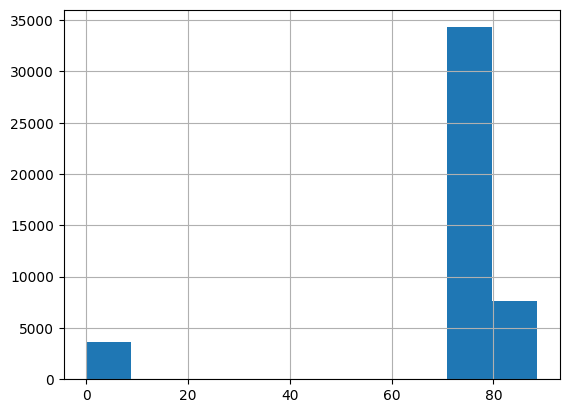

In [10]:
df['Delivery_location_longitude'].hist()

<Axes: >

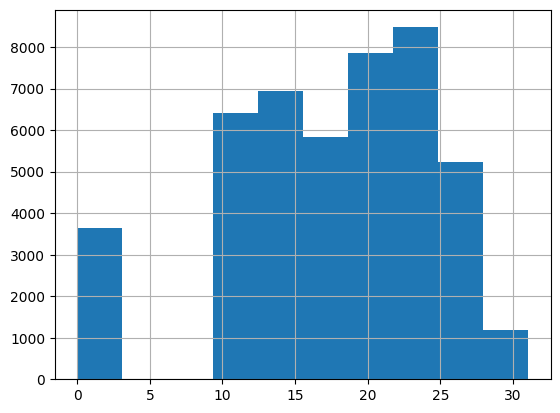

In [11]:
df['Delivery_location_latitude'].hist()

###  As We can see there are  outliers so I  am  Handel it by make it nans then imput it by knn
### but as we can conclude from this data is supposed to be Happend in India so I am Going to get the india coordinate then filter the outliers

In [12]:
## after search i got india latitude between 8 & 37
### india long is between 68 & 97 
invalid_rows = df[
    ~(
        df['Delivery_location_latitude'].between(8, 37) &
        df['Delivery_location_longitude'].between(68, 97)
    )
]
len(invalid_rows)


3640

In [13]:
df.loc[~df['Delivery_location_latitude'].between(8, 37), 'Delivery_location_latitude'] = np.nan
df.loc[~df['Delivery_location_longitude'].between(68, 97), 'Delivery_location_longitude'] = np.nan


test.loc[~test['Delivery_location_latitude'].between(8, 37), 'Delivery_location_latitude'] = np.nan
test.loc[~test['Delivery_location_longitude'].between(68, 97), 'Delivery_location_longitude'] = np.nan

In [14]:
## Handel nans by knn 
coords = ['Delivery_location_latitude', 'Delivery_location_longitude']
imputer = KNNImputer(n_neighbors=3)
df[coords] = imputer.fit_transform(df[coords])
test[coords] = imputer.transform(test[coords])

## `Resturant Latitude & Longtiude` 

In [15]:
df['Restaurant_latitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Restaurant_latitude
Non-Null Count  Dtype  
--------------  -----  
45593 non-null  float64
dtypes: float64(1)
memory usage: 356.3 KB


<Axes: >

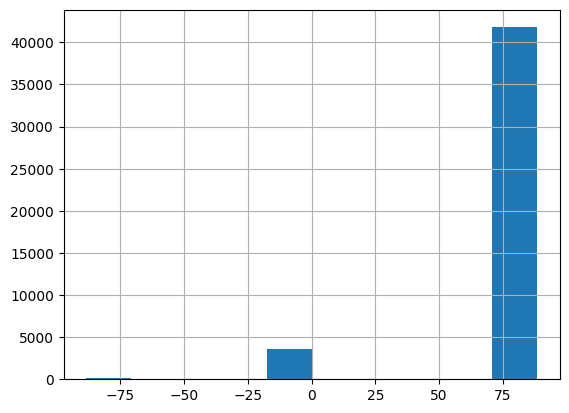

In [16]:
df['Restaurant_longitude'].hist()

<Axes: >

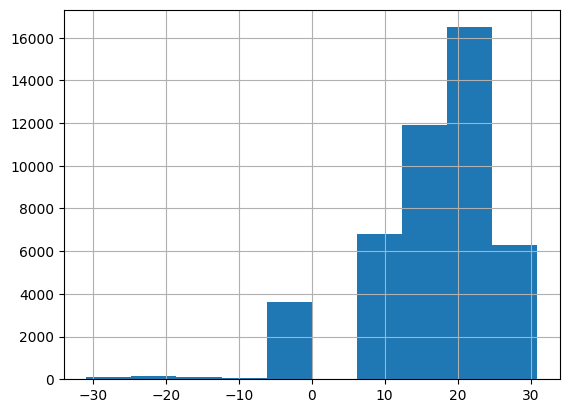

In [17]:
df['Restaurant_latitude'].hist()

In [18]:
df.loc[~df['Restaurant_latitude'].between(8, 37), 'Restaurant_latitude'] = np.nan
df.loc[~df['Restaurant_longitude'].between(68, 97), 'Restaurant_longitude'] = np.nan

test.loc[~test['Restaurant_latitude'].between(8, 37), 'Restaurant_latitude'] = np.nan
test.loc[~test['Restaurant_longitude'].between(68, 97), 'Restaurant_longitude'] = np.nan

In [19]:
coords = ['Restaurant_latitude', 'Restaurant_longitude']
imputer = KNNImputer(n_neighbors=3)
df[coords] = imputer.fit_transform(df[coords])
test[coords] = imputer.transform(test[coords])

## `Delivery_person_ID Cleaning and Feature Extraction of It`

In [20]:
df['Delivery_person_ID'] = df['Delivery_person_ID'].str.strip()
test['Delivery_person_ID'] = test['Delivery_person_ID'].str.strip()


In [21]:
df['Delivery_person_ID'].duplicated().sum()

44273

### Delivery Person ID Pattern

After analyzing the `Delivery_person_ID` column, I concluded that it follows a clear pattern:


- **CityCode** → The first few letters represent the city (e.g., HYD, CHEN, DEH, RANCHI).  
- **RES<number>** → Indicates the restaurant number (e.g., RES13 → Restaurant 13).  
- **DEL<number>** → Indicates the delivery person number (e.g., DEL12 → Delivery Person 12).  

#### Examples:

| Delivery_person_ID | City   | Restaurant Number | Delivery Person Number |
|------------------|--------|-----------------|----------------------|
| HYDRES09DEL03     | HYD    | 09              | 03                   |
| CHENRES12DEL01    | CHEN   | 12              | 01                   |
| DEHRES17DEL01     | DEH    | 17              | 01                   |
| RANCHIRES15DEL01  | RANCHI | 15              | 01                   |


### So  I am Going To extract these information from this columns

In [22]:
df['City_of_order'] = df['Delivery_person_ID'].str.extract(r'^([A-Z]+)RES')
df['Restaurant_number']=df['Delivery_person_ID'].str.extract(r'RES(\d+)')
df['Delivery_person_number']=df['Delivery_person_ID'].str.extract(r'DEL(\d+)')
df=df.drop(columns=['Delivery_person_ID'])

In [23]:
## same Thing on The test
test['City_of_order'] = test['Delivery_person_ID'].str.extract(r'^([A-Z]+)RES')
test['Restaurant_number']=test['Delivery_person_ID'].str.extract(r'RES(\d+)')
test['Delivery_person_number']=test['Delivery_person_ID'].str.extract(r'DEL(\d+)')
test=test.drop(columns=['Delivery_person_ID'])


In [24]:
df['Delivery_person_number']=pd.to_numeric(df['Delivery_person_number'],errors='coerce')
df['Restaurant_number']=pd.to_numeric(df['Restaurant_number'],errors='coerce')

#---------------------------------------------------------------------#
test['Delivery_person_number']=pd.to_numeric(test['Delivery_person_number'],errors='coerce')
test['Restaurant_number']=pd.to_numeric(test['Restaurant_number'],errors='coerce')


## `City_of_order Column Cleaning`

In [25]:
df['City_of_order'].unique()

array(['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH',
       'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA',
       'AURG', 'AGR', 'VAD', 'ALH', 'BHP'], dtype=object)

In [26]:
city_map = {
    'INDO': 'Indore',
    'BANG': 'Bangalore',
    'COIMB': 'Coimbatore',
    'CHEN': 'Chennai',
    'HYD': 'Hyderabad',
    'RANCHI': 'Ranchi',
    'MYS': 'Mysore',
    'DEH': 'Delhi',
    'KOC': 'Kochi',
    'PUNE': 'Pune',
    'LUDH': 'Ludhiana',
    'KNP': 'Kanpur',
    'MUM': 'Mumbai',
    'KOL': 'Kolkata',
    'JAP': 'Jaipur',
    'SUR': 'Surat',
    'GOA': 'Goa',
    'AURG': 'Aurangabad',
    'AGR': 'Agra',
    'VAD': 'Vadodara',
    'ALH': 'Aligarh',
    'BHP': 'Bhopal'
}

df['City_of_order'] = df['City_of_order'].map(city_map)
#------------------------------------#
test['City_of_order'] = test['City_of_order'].map(city_map)


## `Type of the order`

In [27]:
df['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [28]:
df['Type_of_order']=df['Type_of_order'].str.strip()
test['Type_of_order']=test['Type_of_order'].str.strip()

## `Order Date Cleaning and Feature Extraction`

In [29]:
df['Order_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Order_Date
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


### As you can see the Dtype is object so  I want to convert it to datetime for Easy Hadel

In [30]:
from dateutil import parser
def parse_date(x):
    try:
        return parser.parse(x)
    except Exception:
        return pd.NaT

df['Order_Date']=df['Order_Date'].apply(parse_date)
##---------------------------------------------------
test['Order_Date']=test['Order_Date'].apply(parse_date)

In [31]:
df['Order_Date'].isna().sum()

0

In [32]:
df['Day_of_order']=df['Order_Date'].dt.day
df['Month_of_order']=df['Order_Date'].dt.month
df['Day']=df['Order_Date'].dt.day_name()
## I didnot  get year becuse this all this date set happend in 2022

test['Day_of_order']=test['Order_Date'].dt.day
test['Month_of_order']=test['Order_Date'].dt.month
test['Day']=test['Order_Date'].dt.day_name()


In [33]:
df['Month_of_order'].unique()  ## validate The month 

array([ 3,  5, 11,  4, 12,  2,  1, 10,  8,  6,  9,  7])

In [34]:
df['Day_of_order'].unique() ## validate The Day

array([19, 25,  4, 26,  3, 14, 20,  2, 13, 16, 15, 27, 30, 28, 18, 24, 29,
       31, 17, 23, 21])

In [35]:
df['Day_of_order'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Day_of_order
Non-Null Count  Dtype
--------------  -----
45593 non-null  int32
dtypes: int32(1)
memory usage: 178.2 KB


In [36]:
df['Day']

0         Saturday
1           Friday
2         Saturday
3        Wednesday
4         Saturday
           ...    
45588     Thursday
45589    Wednesday
45590     Thursday
45591       Sunday
45592     Thursday
Name: Day, Length: 45593, dtype: object

In [37]:
df['Day'].unique()

array(['Saturday', 'Friday', 'Wednesday', 'Thursday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

## `Time Orderd`

In [38]:
df['Time_Orderd'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_Orderd
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [39]:
df['Time_Orderd'].isna().sum()

0

In [40]:
df['Time_Orderd']=df['Time_Orderd'].str.strip()

test['Time_Orderd']=test['Time_Orderd'].str.strip()

In [41]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')

test['Time_Orderd'] = pd.to_datetime(test['Time_Orderd'], format='%H:%M:%S', errors='coerce')


In [42]:
df['Time_Orderd'].isna().sum()

1731

In [43]:
df['Time_Orderd']

0       1900-01-01 11:30:00
1       1900-01-01 19:45:00
2       1900-01-01 08:30:00
3       1900-01-01 18:00:00
4       1900-01-01 13:30:00
                ...        
45588   1900-01-01 11:35:00
45589   1900-01-01 19:55:00
45590   1900-01-01 23:50:00
45591   1900-01-01 13:35:00
45592   1900-01-01 17:10:00
Name: Time_Orderd, Length: 45593, dtype: datetime64[ns]

#### I will impute nans by group by  resturant for each category average time

In [44]:
import pandas as pd
import numpy as np

# ------------------- Train Data Imputation -------------------

# Fill missing Time_Orderd in train using group mean
df['Time_Orderd'] = df.groupby(
    ['Restaurant_number', 'Type_of_order', 'Time_Order_picked']
)['Time_Orderd'].transform(lambda x: x.fillna(x.mean()))

# ------------------- Test Data Imputation -------------------

# Step 1: Compute group means from train only
group_means = df.groupby(
    ['Restaurant_number', 'Type_of_order', 'Time_Order_picked'],
    as_index=False
)['Time_Orderd'].mean()

# Step 2: Merge test with train group means
test = test.merge(
    group_means,
    on=['Restaurant_number', 'Type_of_order', 'Time_Order_picked'],
    how='left',
    suffixes=('', '_mean')
)

# Step 3: Fill missing values in test with group mean
test['Time_Orderd'] = test['Time_Orderd'].fillna(test['Time_Orderd_mean'])

# Step 4: Drop the temporary column
test.drop(columns=['Time_Orderd_mean'], inplace=True)


In [45]:
df['Time_Orderd'].isna().sum()

128

In [46]:
overall_mean = df['Time_Orderd'].mean()
df['Time_Orderd'] = df['Time_Orderd'].fillna(overall_mean)
test['Time_Orderd'] = test['Time_Orderd'].fillna(overall_mean)


In [47]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'City_of_order', 'Restaurant_number', 'Delivery_person_number',
       'Day_of_order', 'Month_of_order', 'Day'],
      dtype='object')

## `time order picked`

In [48]:
df['Time_Order_picked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Time_Order_picked
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [49]:
df['Time_Order_picked']=df['Time_Order_picked'].str.strip()
test['Time_Order_picked']=test['Time_Order_picked'].str.strip()

In [50]:
df['Time_Order_picked'].isna().sum()

0

In [51]:
df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'],format='%H:%M:%S',errors='coerce')

test['Time_Order_picked']=pd.to_datetime(test['Time_Order_picked'],format='%H:%M:%S',errors='coerce')


## `Weatherconditions Cleaning`

In [55]:
df['Weatherconditions'].value_counts()

Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [56]:
mapping = {
    "conditions Sunny": "sunny",
    "conditions Stormy": "stormy",
    "conditions Sandstorms": "stormy",
    "conditions Windy": "windy",
    "conditions Fog": "fog",
    "conditions Cloudy": "cloudy",
    "conditions NaN": np.nan
}

df['Weatherconditions']=df['Weatherconditions'].map(mapping)

test['Weatherconditions']=test['Weatherconditions'].map(mapping)

df['Weatherconditions'].unique()

array(['sunny', 'stormy', 'cloudy', 'fog', 'windy', nan], dtype=object)

In [58]:
### impute nans by the knn 
df['Weatherconditions'].isna().sum()



616

In [59]:
df['Weatherconditions'].value_counts()

Weatherconditions
stormy    15081
fog        7654
cloudy     7536
windy      7422
sunny      7284
Name: count, dtype: int64

In [60]:
import pandas as pd

# ------------------- TRAIN -------------------
def fill_weather(x):
    mode = x.mode()
    if not mode.empty:
        return x.fillna(mode.iloc[0])
    return x

df['Weatherconditions'] = df.groupby(
    ['Month_of_order', 'City_of_order']
)['Weatherconditions'].transform(fill_weather)

# ------------------- TEST -------------------

# Step 1: Compute train group mode
group_weather_mode = df.groupby(
    ['Month_of_order', 'City_of_order'],
    as_index=False
)['Weatherconditions'].agg(lambda x: x.mode().iloc[0])

# Step 2: Merge test with train group mode
test = test.merge(
    group_weather_mode,
    on=['Month_of_order', 'City_of_order'],
    how='left',
    suffixes=('', '_mode')
)

# Step 3: Fill missing values in test with group mode
test['Weatherconditions'] = test['Weatherconditions'].fillna(test['Weatherconditions_mode'])

# Step 4: Drop temporary column
test.drop(columns=['Weatherconditions_mode'], inplace=True)

# Step 5: If still missing (no matching group in train), fill with global train mode
global_mode = df['Weatherconditions'].mode().iloc[0]
test['Weatherconditions'] = test['Weatherconditions'].fillna(global_mode)


In [61]:
df['Weatherconditions'].isna().sum()

0

## `Road_traffic_density`

In [62]:
df['Road_traffic_density']=df['Road_traffic_density'].str.strip()
test['Road_traffic_density']=test['Road_traffic_density'].str.strip()

In [63]:
df['Road_traffic_density'].unique()

array(['High', 'Jam', 'Low', 'Medium', 'NaN'], dtype=object)

In [64]:
df['Road_traffic_density']=df['Road_traffic_density'].str.replace("Jam","High")
df['Road_traffic_density']=df['Road_traffic_density'].replace("NaN",np.nan)
#####-TEST-
test['Road_traffic_density']=test['Road_traffic_density'].str.replace("Jam","High")
test['Road_traffic_density']=test['Road_traffic_density'].replace("NaN",np.nan)

In [65]:
df['Road_traffic_density'].isna().sum()

601

In [67]:
from sklearn.impute import KNNImputer

# Step 1: Encode
df['Road_traffic_code'] = df['Road_traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})
test['Road_traffic_code'] = test['Road_traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})


# Step 2: KNN Imputer (include the numeric traffic column)
imputer = KNNImputer(n_neighbors=5)
df[['Delivery_location_longitude', 'Delivery_location_latitude', 'Restaurant_latitude','Restaurant_longitude' ,'Road_traffic_code']] = imputer.fit_transform(
    df[['Delivery_location_longitude', 'Delivery_location_latitude', 'Restaurant_latitude','Restaurant_longitude','Road_traffic_code']]
)

test[['Delivery_location_longitude', 'Delivery_location_latitude', 'Restaurant_latitude','Restaurant_longitude' ,'Road_traffic_code']] = imputer.transform(
    test[['Delivery_location_longitude', 'Delivery_location_latitude', 'Restaurant_latitude','Restaurant_longitude','Road_traffic_code']]
)

# Step 3: Decode back
reverse = {1:'Low', 2:'Medium', 3:'High'}
df['Road_traffic_density'] = df['Road_traffic_code'].round().map(reverse)
test['Road_traffic_density'] = test['Road_traffic_code'].round().map(reverse)


# Step 4: Drop temporary column
df.drop(columns=['Road_traffic_code'], inplace=True)
test.drop(columns=['Road_traffic_code'], inplace=True)



In [68]:
df['Road_traffic_density'].isna().sum()

0

## `Type of Vehicle`

In [69]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [70]:
df['Type_of_vehicle']=df['Type_of_vehicle'].str.strip()
test['Type_of_vehicle']=test['Type_of_vehicle'].str.strip()

In [71]:
df['Type_of_vehicle'].isna().sum()

0

## `Festival`

In [72]:
df['Festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [73]:
df['Festival']=df['Festival'].str.strip()
test['Festival']=test['Festival'].str.strip()

In [74]:
df['Festival']=df['Festival'].replace('NaN',np.nan)
test['Festival']=test['Festival'].replace('NaN',np.nan)

In [75]:
df['Festival'].isna().sum()

228

In [76]:
df['Festival']=df['Festival'].fillna(df['Festival'].mode()[0])
mode_fes=df['Festival'].mode()[0]
test['Festival']=test['Festival'].fillna(mode_fes)

In [77]:
df['Festival'].isna().sum()

0

## `City`

In [78]:
df['City'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [79]:
df['City']=df['City'].str.strip()

test['City']=test['City'].str.strip()


In [80]:
df['City']=df['City'].replace("NaN",np.nan)
test['City']=test['City'].replace("NaN",np.nan)

In [81]:
df['City'].isna().sum()

1200

In [82]:
df['City'].value_counts()

City
Metropolitian    34093
Urban            10136
Semi-Urban         164
Name: count, dtype: int64

#### as We can see Semi-Urban is really low relative to other categories so I am Going To merge them with Urban 

<Axes: >

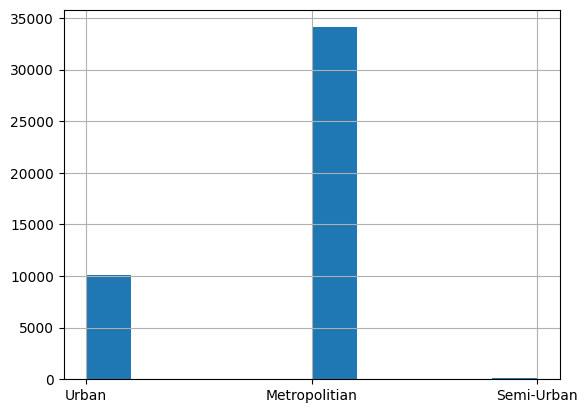

In [83]:
df['City'].hist()

In [85]:
df['Road_traffic_density'].isna().sum()

0

In [86]:
df['City'].isna().sum()

1200

In [87]:
df['City_code'] = df['City'].map({
    'Urban': 1,
    'Semi-Urban': 2,
    'Metropolitian': 3
})
test['City_code'] = test['City'].map({
    'Urban': 1,
    'Semi-Urban': 2,
    'Metropolitian': 3
})

imputer = KNNImputer(n_neighbors=5)

# Include numeric features that help predict city type
df[['Restaurant_latitude', 'Restaurant_longitude',
    'Delivery_location_latitude', 'Delivery_location_longitude', 'City_code']] = imputer.fit_transform(
    df[['Restaurant_latitude', 'Restaurant_longitude',
        'Delivery_location_latitude', 'Delivery_location_longitude', 'City_code']])
    
test[['Restaurant_latitude', 'Restaurant_longitude',
    'Delivery_location_latitude', 'Delivery_location_longitude', 'City_code']] = imputer.transform(
    test[['Restaurant_latitude', 'Restaurant_longitude',
        'Delivery_location_latitude', 'Delivery_location_longitude', 'City_code']])
    
reverse = {1:'Urban', 2:'Semi-Urban', 3:'Metropolitan'}
df['City'] = df['City_code'].round().map(reverse)

test['City'] = test['City_code'].round().map(reverse)

df.drop(columns=['City_code'], inplace=True)
test.drop(columns=['City_code'], inplace=True)



In [88]:
df['City'].isna().sum()

0

## `Time Taken`

In [89]:
df['Time_taken(min)']

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
45588    (min) 32
45589    (min) 36
45590    (min) 16
45591    (min) 26
45592    (min) 36
Name: Time_taken(min), Length: 45593, dtype: object

In [90]:
df['Time_taken(min)']=df['Time_taken(min)'].str.split().str[1]
df['Time_taken(min)']

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: object

In [91]:
df['Time_taken(min)']=pd.to_numeric(df['Time_taken(min)'],errors='coerce')

## `Delivery_person_Age`

In [93]:
df['Delivery_person_Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_person_Age
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [94]:
df['Delivery_person_Age'].value_counts()

Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64

In [95]:
df['Delivery_person_Age']=pd.to_numeric(df['Delivery_person_Age'],errors='coerce')

test['Delivery_person_Age']=pd.to_numeric(test['Delivery_person_Age'],errors='coerce')

<Axes: >

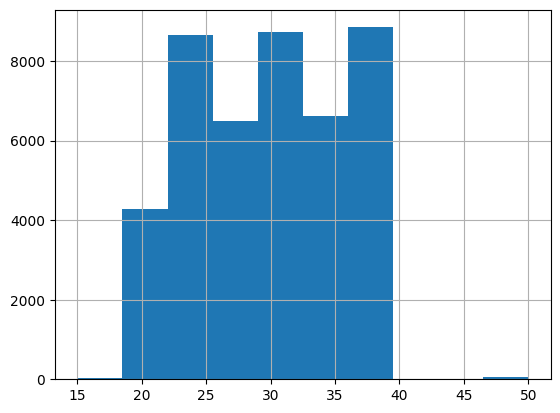

In [96]:
df['Delivery_person_Age'].hist()

In [97]:
## Handeling outlier 
q1 = df['Delivery_person_Age'].quantile(0.25)
q3 = df['Delivery_person_Age'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

median_age = df['Delivery_person_Age'].median()

df.loc[df['Delivery_person_Age'] >= upper_bound, 'Delivery_person_Age'] = median_age

test.loc[test['Delivery_person_Age'] >= upper_bound, 'Delivery_person_Age'] = median_age

In [98]:
## i made this becuse no one can Drive by it self till it becomes 20 years old and get the license
filt=df['Delivery_person_Age']<=15
df.loc[filt,'Delivery_person_Age']=20
df.loc[filt,'Delivery_person_Age']=20


In [99]:
df['Delivery_person_Age'].median()

30.0

In [100]:
## Handel nans by Knn  
df['Delivery_person_Age'].isna().sum()

1854

In [101]:
def random_percentage_impute(series):
    """
    Fill missing values in a pandas Series based on 
    the percentage distribution of existing values.
    """
    # get distribution of non-missing values
    dist = series.dropna().value_counts(normalize=True)

    # indices of missing values
    missing_idx = series[series.isna()].index

    # sample values according to the distribution
    series.loc[missing_idx] = np.random.choice(
        dist.index,
        size=len(missing_idx),
        p=dist.values
    )

    return series

df['Delivery_person_Age'] = random_percentage_impute(df['Delivery_person_Age'])
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)

# Step 2: Compute distribution from train
dist_train = df['Delivery_person_Age'].value_counts(normalize=True)

# Step 3: Fill missing values in test
missing_idx = test[test['Delivery_person_Age'].isna()].index
test.loc[missing_idx, 'Delivery_person_Age'] = np.random.choice(
    dist_train.index,
    size=len(missing_idx),
    p=dist_train.values
)

test['Delivery_person_Age'] = test['Delivery_person_Age'].astype(int)



C:\Users\2M\AppData\Local\Temp\ipykernel_11952\1831940878.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_idx] = np.random.choice(


## `Delivery_person_Ratings`

In [104]:
df['Delivery_person_Ratings'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_person_Ratings
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [105]:
df['Delivery_person_Ratings'].unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 'NaN ', '3.8', '3.9', '3.7', '2.6', '2.5', '3.6',
       '3.1', '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

In [106]:
df['Delivery_person_Ratings']=pd.to_numeric(df['Delivery_person_Ratings'],errors='coerce')

test['Delivery_person_Ratings']=pd.to_numeric(test['Delivery_person_Ratings'],errors='coerce')



In [107]:
df['Delivery_person_Ratings'].value_counts()

Delivery_person_Ratings
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

In [108]:

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].clip(0,5)

test['Delivery_person_Ratings']=test['Delivery_person_Ratings'].clip(0,5)


In [109]:
### Handel nans  by knn 
df['Delivery_person_Ratings'].isna().sum()

1908

In [110]:
cols_for_knn = ['Delivery_person_Ratings']

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform both columns together
df[cols_for_knn] = imputer.fit_transform(df[cols_for_knn])
test[cols_for_knn] = imputer.transform(test[cols_for_knn])

In [111]:
df['Delivery_person_Age']=df['Delivery_person_Age'].round().astype(int)

In [112]:
df['Delivery_person_Age'].value_counts()

Delivery_person_Age
30    2372
36    2351
35    2348
37    2320
24    2319
38    2316
32    2297
29    2295
22    2293
33    2286
20    2269
25    2263
28    2263
34    2252
26    2249
39    2247
27    2237
21    2233
31    2220
23    2163
Name: count, dtype: int64

In [113]:
df['Delivery_person_Age'].isna().sum()

0

## `Vehicle_condition `

In [115]:
df['Vehicle_condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Vehicle_condition
Non-Null Count  Dtype
--------------  -----
45593 non-null  int64
dtypes: int64(1)
memory usage: 356.3 KB


In [116]:
df['Vehicle_condition'].isna().sum()

0

In [117]:
df['Vehicle_condition'].value_counts()

Vehicle_condition
2    15034
1    15030
0    15009
3      520
Name: count, dtype: int64

## `multiple_deliveries`

In [118]:
df['multiple_deliveries'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: multiple_deliveries
Non-Null Count  Dtype 
--------------  ----- 
45593 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [119]:
df['multiple_deliveries'].isna().sum()

0

In [120]:
df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [121]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1       28159
0       14095
2        1985
NaN       993
3         361
Name: count, dtype: int64

In [122]:
df['multiple_deliveries']=pd.to_numeric(df['multiple_deliveries'],errors='coerce')
test['multiple_deliveries']=pd.to_numeric(test['multiple_deliveries'],errors='coerce')

In [123]:
df['multiple_deliveries'].unique()

array([ 0.,  1.,  3., nan,  2.])

In [124]:
df['multiple_deliveries'].isna().sum()

993

In [125]:
df['multiple_deliveries'].value_counts()
df['multiple_deliveries']=df['multiple_deliveries'].fillna(df['multiple_deliveries'].median())
el_median=df['multiple_deliveries'].median()

test['multiple_deliveries']=test['multiple_deliveries'].fillna(el_median)


In [126]:
df['multiple_deliveries'].isna().sum()

0

## `Check`

In [127]:
df.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
City_of_order                  0
Restaurant_number              0
Delivery_person_number         0
Day_of_order                   0
Month_of_order                 0
Day                            0
dtype: int64

In [129]:
test.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
City_of_order                  0
Restaurant_number              0
Delivery_person_number         0
Day_of_order                   0
Month_of_order                 0
Day                            0
dtype: int64

In [ ]:
## if You Want to save Cleaned version
# df.to_csv("Cleaned_Train.csv", index=False)
# test.to_csv("Cleaned_Test.csv", index=False)


## `EDA`

### `What is the average delivery time?`

In [131]:
print(f"Average Time Taken to  {round(df['Time_taken(min)'].mean(),2)}")

Average Time Taken to  26.29


### `Which city has the fastest and slowest delivery times?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\3566627023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_times,x='City_of_order',y='Time_taken(min)',palette='coolwarm')


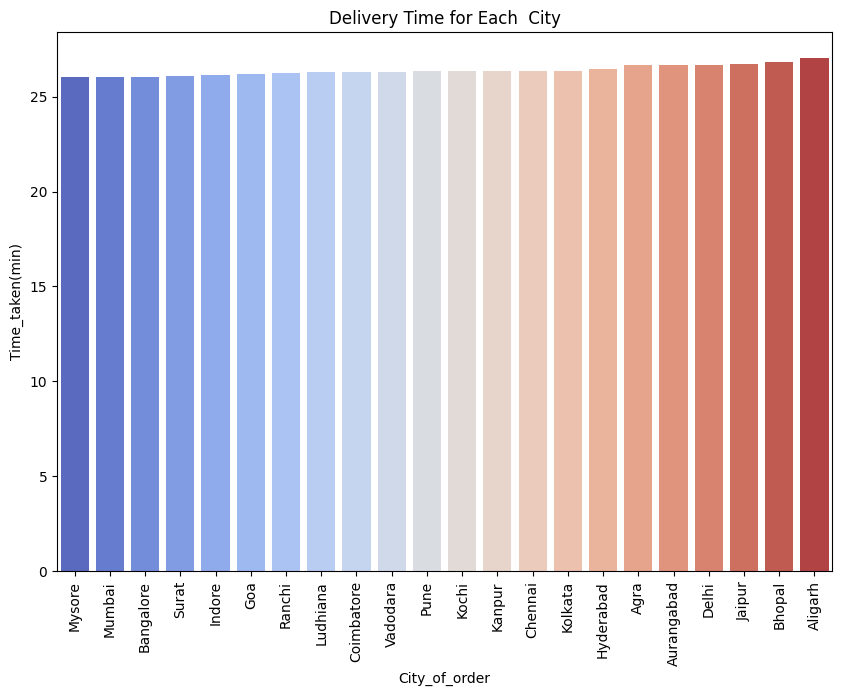

In [132]:
city_times = df.groupby('City_of_order')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=city_times,x='City_of_order',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  City")
plt.show()


In [133]:
fastest_city = city_times.loc[0,'City_of_order']
fastest_time = city_times.loc[0,'Time_taken(min)']
print("Fastest city:", fastest_city, "with", round(fastest_time, 2), "minutes")

Fastest city: Mysore with 26.01 minutes


In [134]:
slowest_city = city_times.iloc[-1]['City_of_order']
slowest_time = city_times.iloc[-1]['Time_taken(min)']
print("Slowest city:", slowest_city, "with", round(slowest_time, 2), "minutes")

Slowest city: Aligarh with 27.03 minutes


### `Which Type of City is Has Fastest Delivery`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\4098976258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_type,x='City',y='Time_taken(min)',palette='coolwarm')


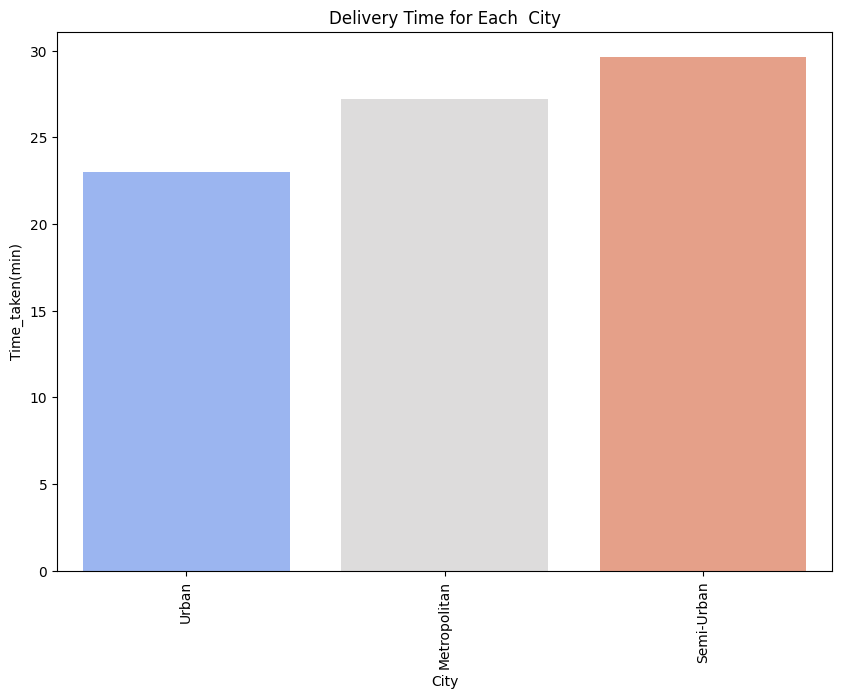

In [135]:
city_type = df.groupby('City')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=city_type,x='City',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  City")
plt.show()

In [136]:
# Get fastest (lowest mean time)
fastest_city = city_type.iloc[0]['City']
fastest_time = city_type.iloc[0]['Time_taken(min)']

# Get slowest (highest mean time)
slowest_city = city_type.iloc[-1]['City']
slowest_time = city_type.iloc[-1]['Time_taken(min)']

msg = (
    f"The fastest delivery is in **{fastest_city}** "
    f"with an average time of **{fastest_time:.2f} minutes**.\n"
    f"The slowest delivery is in **{slowest_city}** "
    f"with an average time of **{slowest_time:.2f} minutes**."
)
print(msg)

The fastest delivery is in **Urban** with an average time of **22.98 minutes**.
The slowest delivery is in **Semi-Urban** with an average time of **29.61 minutes**.


### `Which day of the week has the highest delivery Times?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\335935754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_fast,x='Day',y='Time_taken(min)',palette='coolwarm')


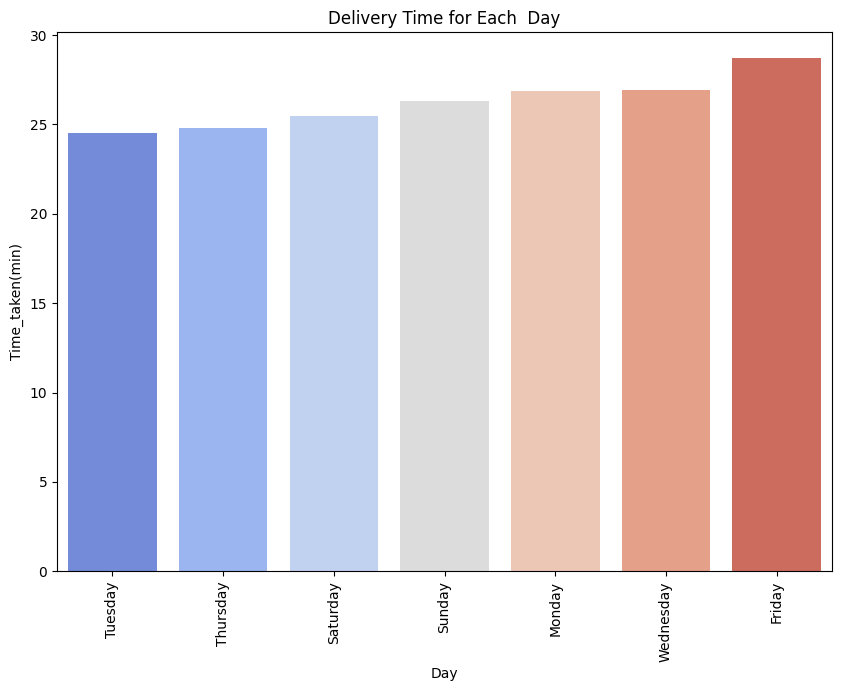

In [137]:
## dont forget to do the same question for delivery delay
day_fast=df.groupby('Day')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=day_fast,x='Day',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Day")
plt.show()

In [138]:
Best_Day = day_fast.loc[0,'Day']
Best_time  = day_fast.loc[0,'Time_taken(min)']
print("Lowest  Days in Delivery Time is:", Best_Day, "with", round(Best_time, 2), "minutes")

Lowest  Days in Delivery Time is: Tuesday with 24.52 minutes


In [139]:
Best_Day = day_fast.iloc[-1]['Day']
Best_time  = day_fast.iloc[-1]['Time_taken(min)']
print("Highest  Days in Delivery Time is:", Best_Day, "with", round(Best_time, 2), "minutes")

Highest  Days in Delivery Time is: Friday with 28.72 minutes


### `Which month has the longest average delivery duration?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\3693521189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_fast,x='Month_of_order',y='Time_taken(min)',palette='coolwarm')


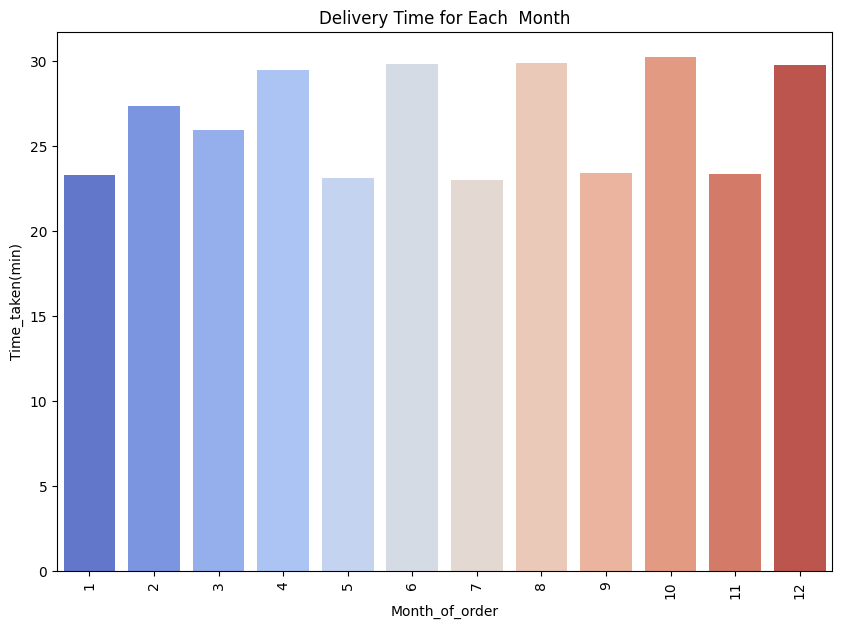

In [140]:
month_fast=df.groupby('Month_of_order')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=month_fast,x='Month_of_order',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Month")
plt.show()

In [141]:
import calendar

lowest_month =month_fast.loc[0,'Month_of_order']
lowest_time =month_fast.loc[0,'Time_taken(min)']
print("Lowest  Month in Delivery Time is:", calendar.month_name[lowest_month], "with", round(lowest_time, 2), "minutes")

Lowest  Month in Delivery Time is: July with 23.0 minutes


In [142]:
Highest_month =int(month_fast.iloc[-1]['Month_of_order'])
fast_time =month_fast.iloc[-1]['Time_taken(min)']
print("Hightest  Month in Delivery Time is:", calendar.month_name[Highest_month], "with", round(fast_time, 2), "minutes")

Hightest  Month in Delivery Time is: October with 30.21 minutes


### `Which type of order (Food, Drinks, Snacks) has the longest delivery time?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\1588333662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=typeorder_fast,x='Type_of_order',y='Time_taken(min)',palette='coolwarm')


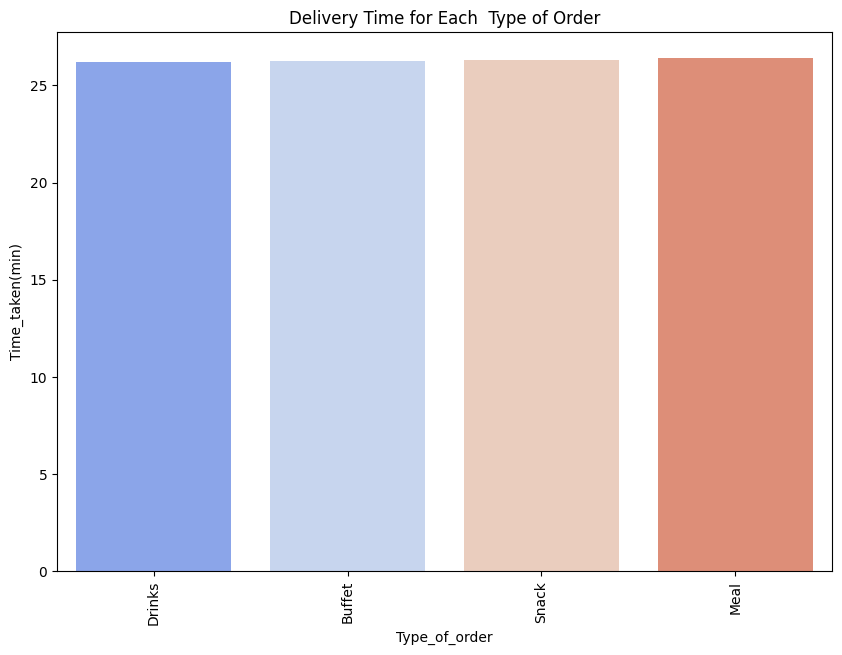

In [143]:
typeorder_fast=df.groupby('Type_of_order')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=typeorder_fast,x='Type_of_order',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Type of Order")
plt.show()


#### As We Can See All Category of Order Almost Have The Same Average Delivering Time.

### `Which type of vehicle leads to faster delivery?`

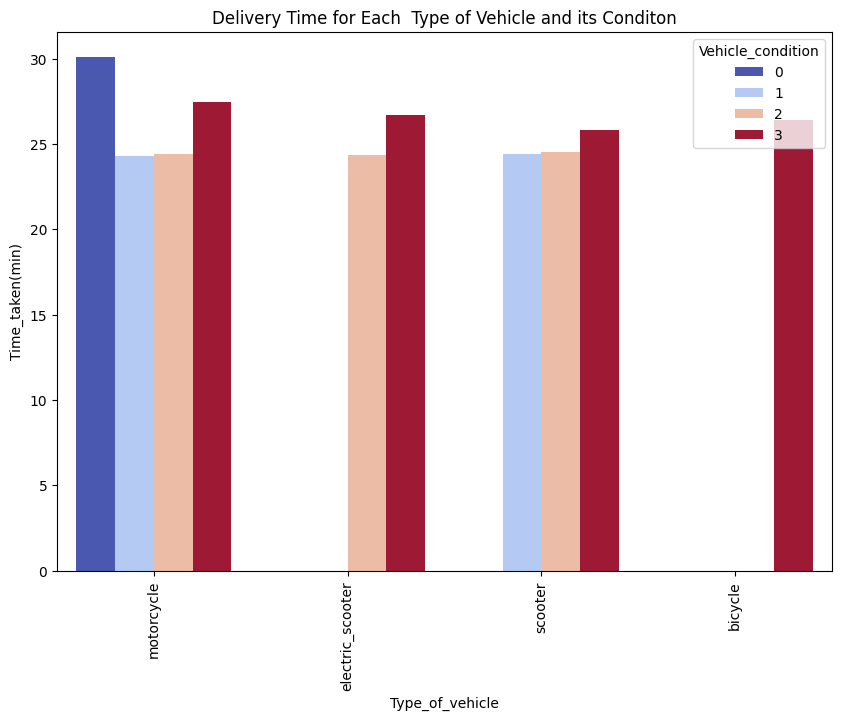

In [144]:
vehicle=df.groupby(['Type_of_vehicle','Vehicle_condition'])['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=vehicle,x='Type_of_vehicle',y='Time_taken(min)',palette='coolwarm',hue='Vehicle_condition')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Type of Vehicle and its Conditon")
plt.show()


In [145]:
Highest_vehicle =(vehicle.iloc[-1]['Type_of_vehicle'])
fast_time =vehicle.iloc[-1]['Time_taken(min)']
print("Hightest  Vehicle in Delivery Time is:", Highest_vehicle, "with", round(fast_time, 2), "minutes")

Hightest  Vehicle in Delivery Time is: motorcycle with 30.07 minutes


In [146]:
Highest_vehicle =(vehicle.iloc[0]['Type_of_vehicle'])
fast_time =vehicle.iloc[0]['Time_taken(min)']
print("Lowest  Vehicle in Delivery Time is:", Highest_vehicle, "with", round(fast_time, 2), "minutes")

Lowest  Vehicle in Delivery Time is: motorcycle with 24.3 minutes


### `Is delivery slower during festivals?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\2885415070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Festival,x='Festival',y='Time_taken(min)',palette='coolwarm')


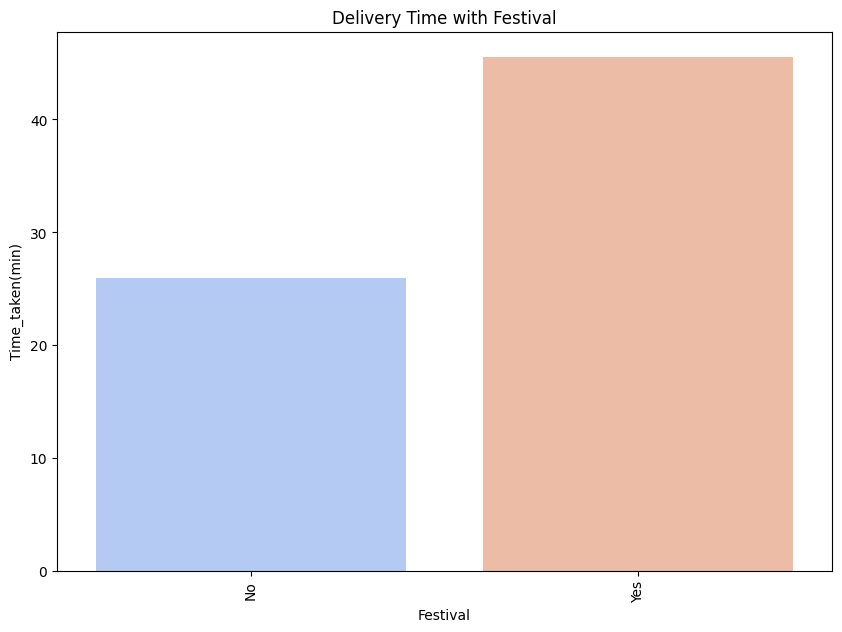

In [147]:
Festival=df.groupby('Festival')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=Festival,x='Festival',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time with Festival")
plt.show()


In [149]:
Fistival_Yes =(Festival.iloc[-1]['Festival'])
fast_time =Festival.iloc[-1]['Time_taken(min)']
print("Delivery Time  During Festival is:", Fistival_Yes, "with", round(fast_time, 2), "minutes")

Delivery Time  During Festival is: Yes with 45.52 minutes


In [150]:
Fistival_No=(Festival.iloc[0]['Festival'])
fast_time =Festival.iloc[0]['Time_taken(min)']
print("Delivery Time  When There is No Festival is:", Fistival_No, "with", round(fast_time, 2), "minutes")

Delivery Time  When There is No Festival is: No with 25.91 minutes


#### it is obvious that Time is affected by there is Festival or not 

### `Does delivery time differ by restaurant?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\2977024889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Res,x='Restaurant_number',y='Time_taken(min)',palette='coolwarm')


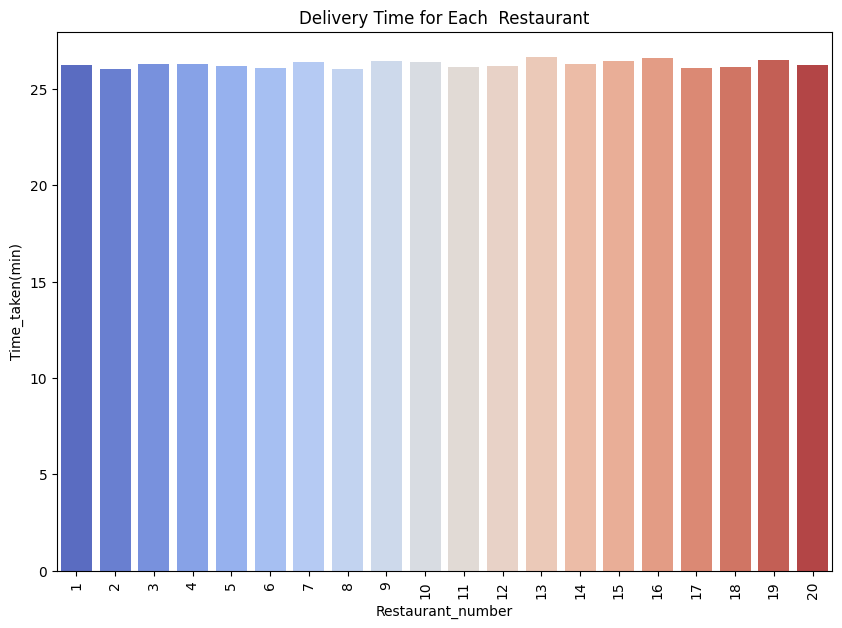

In [151]:
Res=df.groupby('Restaurant_number')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=Res,x='Restaurant_number',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Restaurant")
plt.show()


#### As We Can See Almost All Resturant Have The Same Delivery Time.


### `Are deliveries getting faster over time (month/day trend)?`

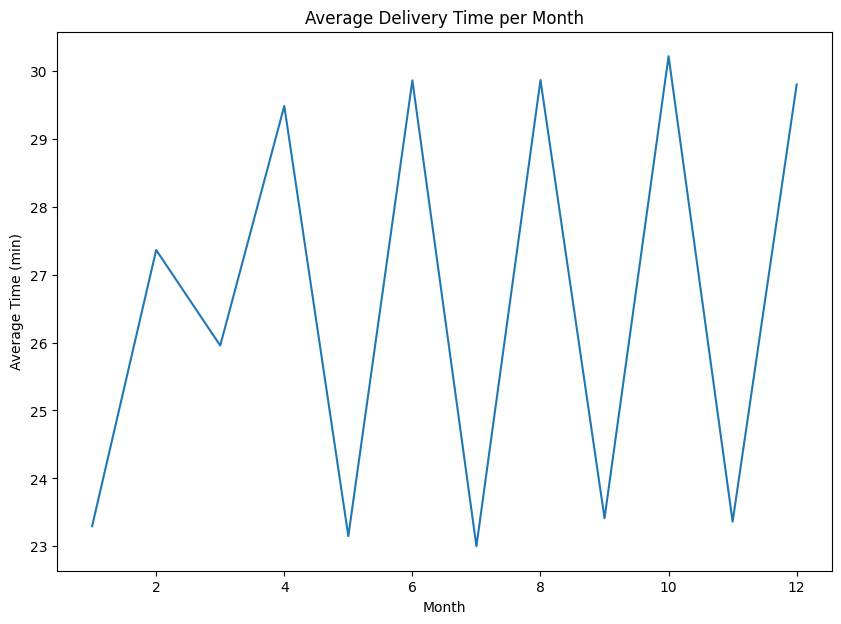

In [152]:
# df_month = df.resample('M', on='Order_Date')['Time_taken(min)'].mean()

plt.figure(figsize=(10,7))
sns.lineplot(data=month_fast,x='Month_of_order', y='Time_taken(min)')
plt.title("Average Delivery Time per Month")
plt.xlabel("Month")
plt.ylabel("Average Time (min)")
plt.show()



#### this plot tell me this is unstable , somw it become Faster then slower  then vise versa but the the range is about 6 mins 

### `How does Weather Condition affect delivery time?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\597203814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Weather,x='Weatherconditions',y='Time_taken(min)',palette='coolwarm')


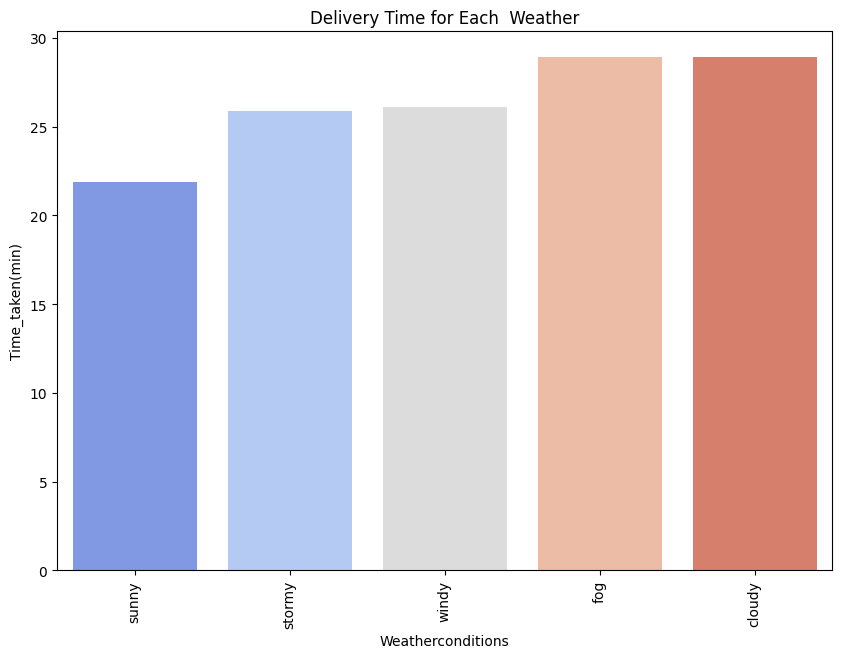

In [153]:
Weather=df.groupby('Weatherconditions')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=Weather,x='Weatherconditions',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Weather")
plt.show()


In [154]:
fastest_weather = Weather.loc[0, 'Weatherconditions']
fastest_time = Weather.loc[0, 'Time_taken(min)']

# Slowest (highest time)
slowest_weather = Weather.iloc[-1]['Weatherconditions']
slowest_time = Weather.iloc[-1]['Time_taken(min)']

s1 = f"Fastest Delivery: {fastest_weather} with {round(fastest_time, 2)} minutes.\n"
s2 = f"Slowest Delivery: {slowest_weather} with {round(slowest_time, 2)} minutes.\n"

msg = (
    f"As we can see, weather conditions significantly affect delivery time. "
    f"{s1} {s2}"
)

print(msg)

As we can see, weather conditions significantly affect delivery time. Fastest Delivery: sunny with 21.87 minutes.
 Slowest Delivery: cloudy with 28.92 minutes.



### `Does higher delivery_person_rating correlate with faster delivery?`

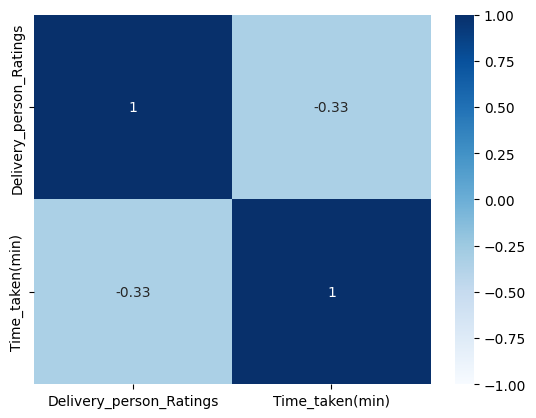

In [155]:
corr = df[['Delivery_person_Ratings','Time_taken(min)']].corr()
sns.heatmap(corr, annot=True, cmap='Blues',vmin=-1)
plt.show()


#### "Yes, there is a clear relationship between Delivery Person Rating and Time Taken. "
####    "The relationship is inverse: higher delivery ratings are generally associated with lower delivery times."
#### , There is A Relation between Delivery Person Rating and Time Taken  it is inversley relationship

### `Does doing multiple deliveries at once slow down delivery time?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\3367743426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=multiple_deliveries,x='multiple_deliveries',y='Time_taken(min)',palette='coolwarm')


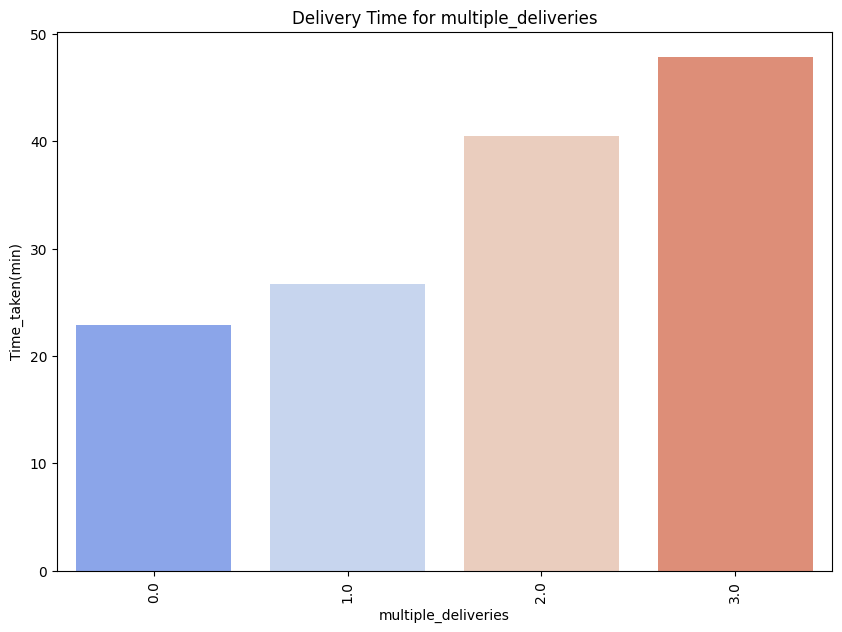

In [156]:
multiple_deliveries=df.groupby('multiple_deliveries')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=multiple_deliveries,x='multiple_deliveries',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for multiple_deliveries")
plt.show()


In [157]:
fastest_count = multiple_deliveries.loc[0, 'multiple_deliveries']
fastest_time = round(multiple_deliveries.loc[0, 'Time_taken(min)'], 2)

# Slowest (highest time)
slowest_count = multiple_deliveries.iloc[-1]['multiple_deliveries']
slowest_time = round(multiple_deliveries.iloc[-1]['Time_taken(min)'], 2)

# Message
msg = (
    f"Fastest Delivery occurs when the delivery person has {int(fastest_count)} "
    f"other deliveries, taking **{fastest_time} minutes** on average.\n\n"
    f"Slowest Delivery occurs when they have {int(slowest_count)} "
    f"other deliveries, taking **{slowest_time} minutes** on average.\n\n"
    f"This indicates that **more multiple deliveries generally increase the delivery time**."
)
print(msg)

Fastest Delivery occurs when the delivery person has 0 other deliveries, taking **22.88 minutes** on average.

Slowest Delivery occurs when they have 3 other deliveries, taking **47.82 minutes** on average.

This indicates that **more multiple deliveries generally increase the delivery time**.


### `Does road traffic density (Low/Medium/High) strongly impact delivery time ?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\1107563328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic,x='Road_traffic_density',y='Time_taken(min)',palette='coolwarm')


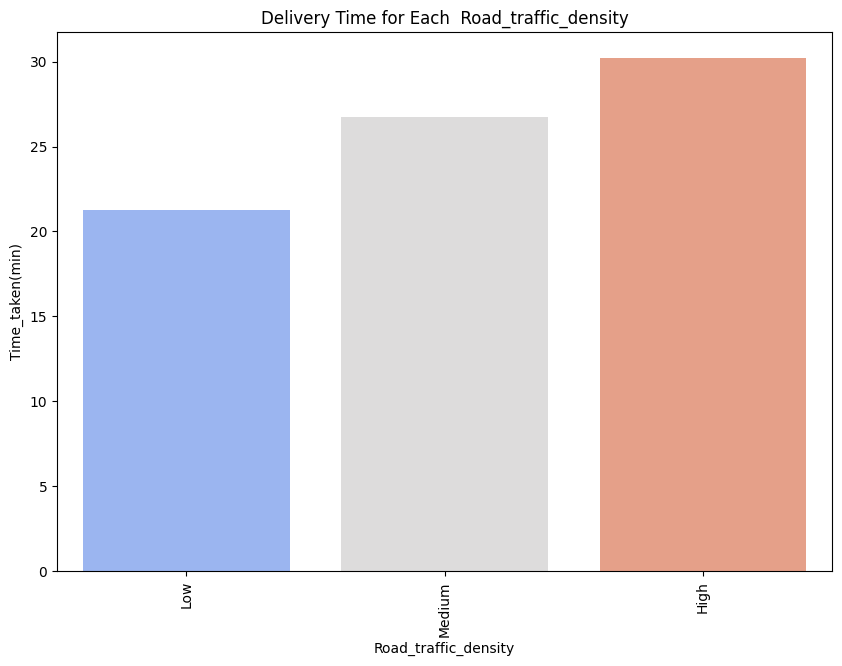

In [158]:
traffic=df.groupby('Road_traffic_density')['Time_taken(min)'].mean().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=traffic,x='Road_traffic_density',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Road_traffic_density")
plt.show()


In [159]:
fastest_cond = traffic.loc[0, 'Road_traffic_density']
fastest_time = round(traffic.loc[0, 'Time_taken(min)'], 2)

# Slowest traffic condition (highest avg time)
slowest_cond = traffic.iloc[-1]['Road_traffic_density']
slowest_time = round(traffic.iloc[-1]['Time_taken(min)'], 2)

# Message
msg = (
    f'''Fastest Delivery occurs during **{fastest_cond}** traffic,
    with an average time of **{fastest_time} minutes**.\n\n
    Slowest Delivery occurs during **{slowest_cond}** traffic 
    with an average time of **{slowest_time} minutes**.\n\n
    This clearly shows that **higher traffic density leads to longer delivery times**.'''
)
print(msg)

Fastest Delivery occurs during **Low** traffic,
    with an average time of **21.28 minutes**.


    Slowest Delivery occurs during **High** traffic 
    with an average time of **30.23 minutes**.


    This clearly shows that **higher traffic density leads to longer delivery times**.


#### as this shown the Road Traffic density affects on Delivery Time  when the traffic is low the Time is less from medium and High

### `Does Age Affects on Delveriy Time ?`

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\2100402778.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age,x='Delivery_person_Age',y='Time_taken(min)',palette='coolwarm')


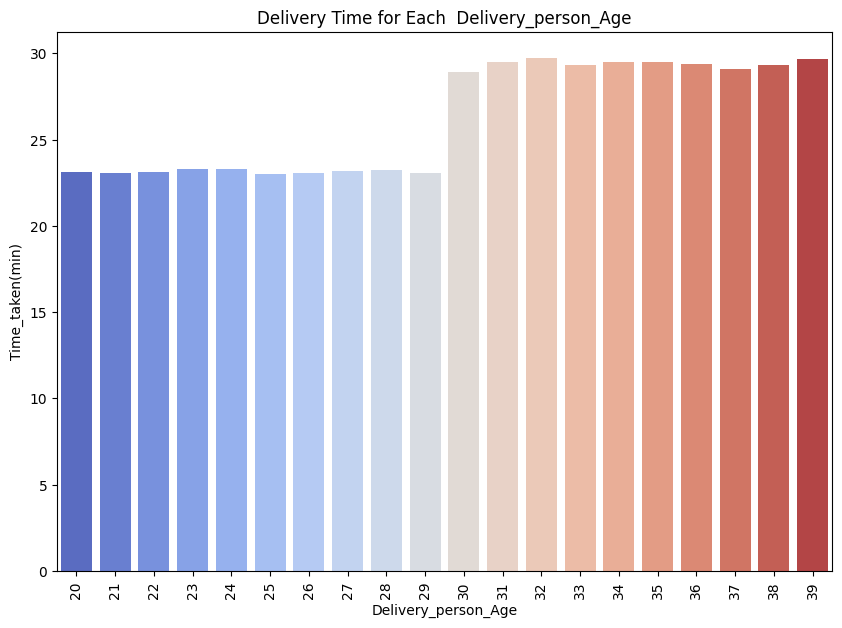

In [160]:
age = ( df.groupby('Delivery_person_Age')['Time_taken(min)'].mean().sort_values().reset_index())

plt.figure(figsize=(10,7))
sns.barplot(data=age,x='Delivery_person_Age',y='Time_taken(min)',palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Delivery Time for Each  Delivery_person_Age")
plt.show()

#### There is a pattern Here Delivery person under 30 are faster Than over 30 !

C:\Users\2M\AppData\Local\Temp\ipykernel_11952\1505422968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Delivery_person_Age',y='Delivery_person_Ratings',palette='coolwarm')


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

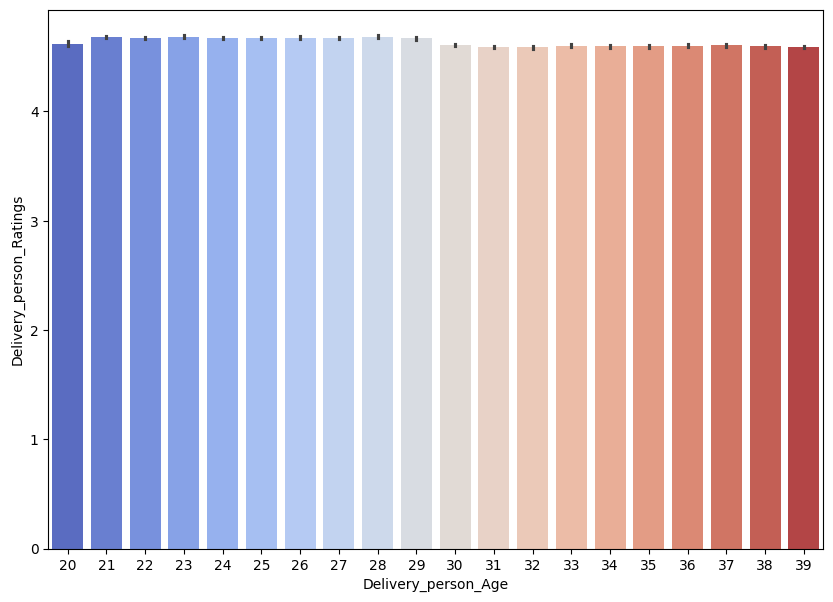

In [161]:
x=df.groupby('Delivery_person_Age')['Delivery_person_Ratings'].mean().sort_values().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='Delivery_person_Age',y='Delivery_person_Ratings',palette='coolwarm')
plt.plot

#### 👉 “Ratings are stable across all ages. No strong age effect.”

### `Box plot for Time`

[]

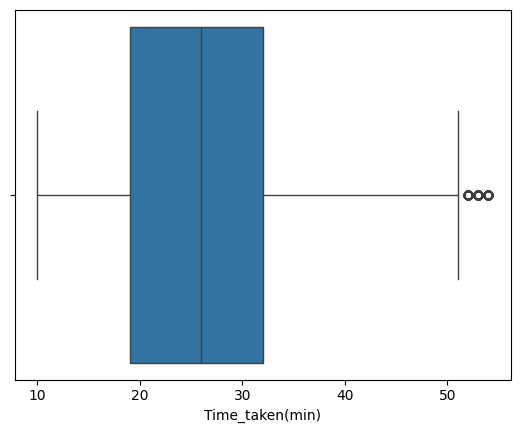

In [162]:
sns.boxplot(x=df['Time_taken(min)'])
plt.plot()

In [163]:
msg='''It seems fine. There is a small number of outliers, but this can happen when several factors occur together,
such as festivals, high traffic, 
poor vehicle conditions, or bad weather.'''
print(msg)

It seems fine. There is a small number of outliers, but this can happen when several factors occur together,
such as festivals, high traffic, 
poor vehicle conditions, or bad weather.


## `Feature Engineering`

In [165]:
df.select_dtypes(include='datetime64')

,Order_Date,Time_Orderd,Time_Order_picked
0,2022-03-19,1900-01-01 11:30:00,1900-01-01 11:45:00
1,2022-03-25,1900-01-01 19:45:00,1900-01-01 19:50:00
2,2022-03-19,1900-01-01 08:30:00,1900-01-01 08:45:00
3,2022-05-04,1900-01-01 18:00:00,1900-01-01 18:10:00
4,2022-03-26,1900-01-01 13:30:00,1900-01-01 13:45:00
...,...,...,...
45588,2022-03-24,1900-01-01 11:35:00,1900-01-01 11:45:00
45589,2022-02-16,1900-01-01 19:55:00,1900-01-01 20:10:00
45590,2022-11-03,1900-01-01 23:50:00,1900-01-01 00:05:00
45591,2022-07-03,1900-01-01 13:35:00,1900-01-01 13:40:00


In [166]:
df=df.drop(columns='Order_Date')
test=test.drop(columns='Order_Date')


In [167]:
df['preparing_order']=df['Time_Order_picked']-df['Time_Orderd']
test['preparing_order']=test['Time_Order_picked']-test['Time_Orderd']

In [168]:
df['preparing_order']

0         0 days 00:15:00
1         0 days 00:05:00
2         0 days 00:15:00
3         0 days 00:10:00
4         0 days 00:15:00
               ...       
45588     0 days 00:10:00
45589     0 days 00:15:00
45590   -1 days +00:15:00
45591     0 days 00:05:00
45592     0 days 00:05:00
Name: preparing_order, Length: 45593, dtype: timedelta64[ns]

In [169]:
df['preparing_order'] = df['preparing_order'].dt.total_seconds() // 60

test['preparing_order'] = test['preparing_order'].dt.total_seconds() // 60


In [170]:
# Train
filt_train = df['preparing_order'] < 0
df.loc[filt_train, 'preparing_order'] = -df.loc[filt_train, 'preparing_order']

# Test
filt_test = test['preparing_order'] < 0
test.loc[filt_test, 'preparing_order'] = -test.loc[filt_test, 'preparing_order']



In [172]:
df=df.drop(columns=['Time_Order_picked','Time_Orderd'])
test=test.drop(columns=['Time_Order_picked','Time_Orderd'])

In [173]:
categ=df.select_dtypes(include='object')
categ

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,City_of_order,Day
0,sunny,High,Snack,motorcycle,No,Urban,Indore,Saturday
1,stormy,High,Snack,scooter,No,Metropolitan,Bangalore,Friday
2,stormy,Low,Drinks,motorcycle,No,Urban,Bangalore,Saturday
3,sunny,Medium,Buffet,motorcycle,No,Metropolitan,Coimbatore,Wednesday
4,cloudy,High,Snack,scooter,No,Metropolitan,Chennai,Saturday
...,...,...,...,...,...,...,...,...
45588,windy,High,Meal,motorcycle,No,Metropolitan,Jaipur,Thursday
45589,windy,High,Buffet,motorcycle,No,Metropolitan,Agra,Wednesday
45590,cloudy,Low,Drinks,scooter,No,Metropolitan,Chennai,Thursday
45591,cloudy,High,Snack,motorcycle,No,Metropolitan,Coimbatore,Sunday


In [174]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['Distance_From_Res_to_customer'] = haversine(
    df['Restaurant_latitude'],
    df['Restaurant_longitude'],
    df['Delivery_location_latitude'],
    df['Delivery_location_longitude']
)

test['Distance_From_Res_to_customer'] = haversine(
    test['Restaurant_latitude'],
    test['Restaurant_longitude'],
    test['Delivery_location_latitude'],
    test['Delivery_location_longitude']
)



In [175]:
df['Distance_From_Res_to_customer']

0         3.025149
1        20.183530
2         1.552758
3         7.790401
4         6.210138
           ...    
45588     1.489846
45589    11.112081
45590     4.657195
45591     6.232393
45592    12.074396
Name: Distance_From_Res_to_customer, Length: 45593, dtype: float64

In [176]:
df['Distance_From_Res_to_customer'].describe()

count    45593.000000
mean        12.319073
std         45.408520
min          1.465067
25%          5.957766
50%         10.427575
75%         13.481329
max       1354.219965
Name: Distance_From_Res_to_customer, dtype: float64

<Axes: >

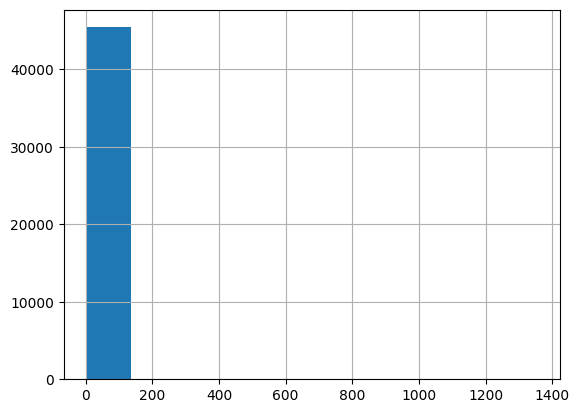

In [177]:
df['Distance_From_Res_to_customer'].hist()

In [178]:
# Compute bounds from training data
q1 = df['Distance_From_Res_to_customer'].quantile(0.25)
q3 = df['Distance_From_Res_to_customer'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = 0.5

# Cap training data
df['Distance_From_Res_to_customer'] = df['Distance_From_Res_to_customer'].clip(lower=lower_bound, upper=upper_bound)

test['Distance_From_Res_to_customer'] = test['Distance_From_Res_to_customer'].clip(lower=lower_bound, upper=upper_bound)


In [179]:
df=df.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])
test=test.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])

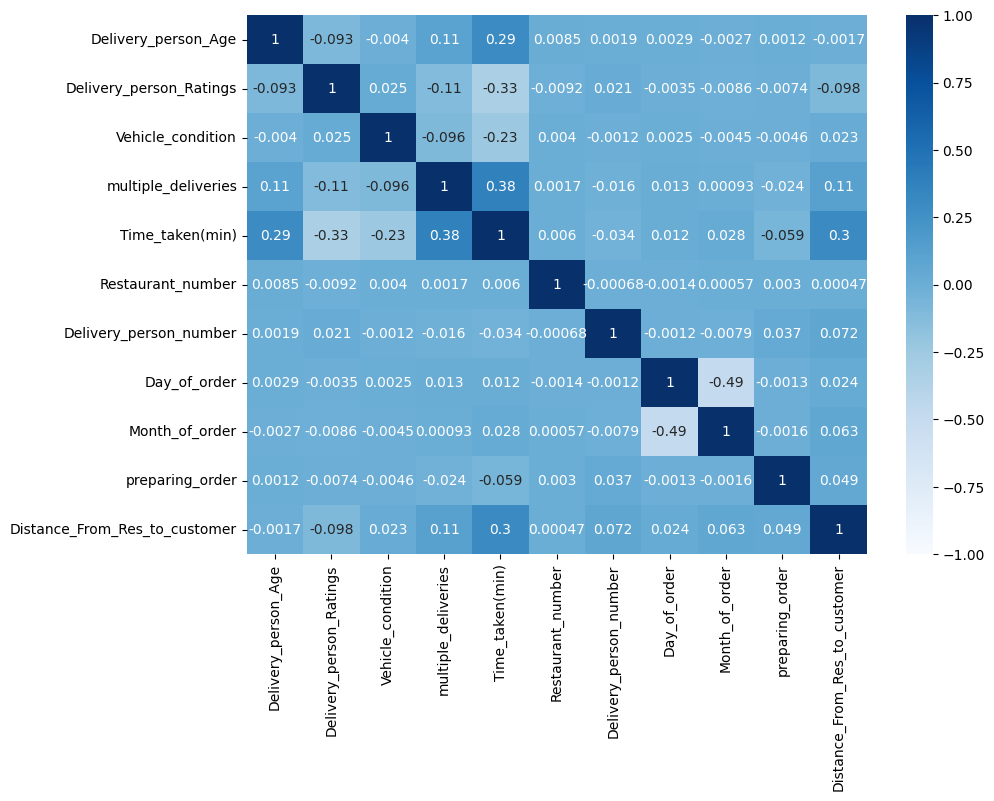

In [182]:
numeric=df.select_dtypes(include='number')
plt.figure(figsize=(10,7))
cor=numeric.corr()
sns.heatmap(cor, annot=True, cmap='Blues',vmin=-1)
plt.show()

In [184]:
y_train = df['Time_taken(min)']
x_train = df.drop(columns=['Time_taken(min)'])


In [185]:

numerical_col=x_train.select_dtypes(include='number').columns.to_list()

In [186]:
numerical_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Vehicle_condition',
 'multiple_deliveries',
 'Restaurant_number',
 'Delivery_person_number',
 'Day_of_order',
 'Month_of_order',
 'preparing_order',
 'Distance_From_Res_to_customer']

In [187]:
col_to_scale= ['Delivery_person_Age',
'Delivery_person_Ratings',
'Restaurant_number',
'Delivery_person_number',
'Day_of_order',
'Month_of_order',
'preparing_order']

In [188]:
col_to_label_Encoding=['Festival']
col_to_one_hot_Encoding=['Weatherconditions','Type_of_order','Type_of_vehicle','City','Day','Road_traffic_density','Vehicle_condition','multiple_deliveries']
col_to_hash_Ecnoding=['City_of_order']


In [189]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from Src.preprocess import preprocessor

In [192]:
pre = preprocessor(
    min_max_col=col_to_scale,
    standard_column=['Distance_From_Res_to_customer'], 
    col_to_hash_Ecnoding=col_to_hash_Ecnoding,
    col_to_label_Encoding=col_to_label_Encoding,
    col_to_one_hot_Encoding=col_to_one_hot_Encoding
)


# Fit + transform your training data
X_train_trans = pre.fit_transform(x_train)  # X_train is your DataFrame
x_test_trans=pre.transform(test)
# If you have test data
# X_test_trans = pre.transform(x)
joblib.dump(pre, "preprocessor.pkl")


['preprocessor.pkl']

In [193]:
np.isnan(x_test_trans).sum()

0

In [194]:
df['Type_of_order'].unique()

array(['Snack', 'Drinks', 'Buffet', 'Meal'], dtype=object)

In [195]:
test['Type_of_order'].unique()

array(['Drinks', 'Snack', 'Meal', 'Buffet'], dtype=object)

In [196]:
df['Weatherconditions'].value_counts()

Weatherconditions
stormy    15690
fog        7657
cloudy     7537
windy      7422
sunny      7287
Name: count, dtype: int64

In [197]:
x_train

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_of_order,Restaurant_number,Delivery_person_number,Day_of_order,Month_of_order,Day,preparing_order,Distance_From_Res_to_customer
0,37,4.9,sunny,High,2,Snack,motorcycle,0.0,No,Urban,Indore,13,2,19,3,Saturday,15.0,3.025149
1,34,4.5,stormy,High,2,Snack,scooter,1.0,No,Metropolitan,Bangalore,18,2,25,3,Friday,5.0,20.183530
2,23,4.4,stormy,Low,0,Drinks,motorcycle,1.0,No,Urban,Bangalore,19,1,19,3,Saturday,15.0,1.552758
3,38,4.7,sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitan,Coimbatore,13,2,4,5,Wednesday,10.0,7.790401
4,32,4.6,cloudy,High,1,Snack,scooter,1.0,No,Metropolitan,Chennai,12,1,26,3,Saturday,15.0,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,windy,High,1,Meal,motorcycle,0.0,No,Metropolitan,Jaipur,4,1,24,3,Thursday,10.0,1.489846
45589,21,4.6,windy,High,0,Buffet,motorcycle,1.0,No,Metropolitan,Agra,16,1,16,2,Wednesday,15.0,11.112081
45590,30,4.9,cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitan,Chennai,8,3,3,11,Thursday,1425.0,4.657195
45591,20,4.7,cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitan,Coimbatore,11,1,3,7,Sunday,5.0,6.232393


In [198]:
from Src.get_feature_names  import get_feature_names

## `Feature Importance`

In [199]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


# 2. Get the transformed feature names
feature_names = get_feature_names(pre)

# 3. Train the model on the transformed features
model = RandomForestRegressor(random_state=42)
model.fit(X_train_trans, y_train)

# 4. Get feature importance
feature_importance = model.feature_importances_

# 5. Match feature importance with feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                             Feature  Importance
1            Delivery_person_Ratings    0.201833
7      Distance_From_Res_to_customer    0.132726
32          Road_traffic_density_Low    0.128953
0                Delivery_person_Age    0.098254
34               Vehicle_condition_0    0.084401
11           Weatherconditions_sunny    0.076815
10          Weatherconditions_stormy    0.025612
12           Weatherconditions_windy    0.024549
2                  Restaurant_number    0.021496
9              Weatherconditions_fog    0.020663
8           Weatherconditions_cloudy    0.017890
40           multiple_deliveries_2.0    0.014465
4                       Day_of_order    0.014191
42                          Festival    0.012970
33       Road_traffic_density_Medium    0.012903
31         Road_traffic_density_High    0.012442
5                     Month_of_order    0.009801
6                    preparing_order    0.008954
3             Delivery_person_number    0.005566
41           multipl

In [200]:
feature_importance_df

,Feature,Importance
1,Delivery_person_Ratings,0.201833
7,Distance_From_Res_to_customer,0.132726
32,Road_traffic_density_Low,0.128953
0,Delivery_person_Age,0.098254
34,Vehicle_condition_0,0.084401
11,Weatherconditions_sunny,0.076815
10,Weatherconditions_stormy,0.025612
12,Weatherconditions_windy,0.024549
2,Restaurant_number,0.021496
9,Weatherconditions_fog,0.020663


In [ ]:
# if You Want to save it un comment it and run 
# feature_importance_df.to_csv("Feature_Importance_Score.csv", index=False)


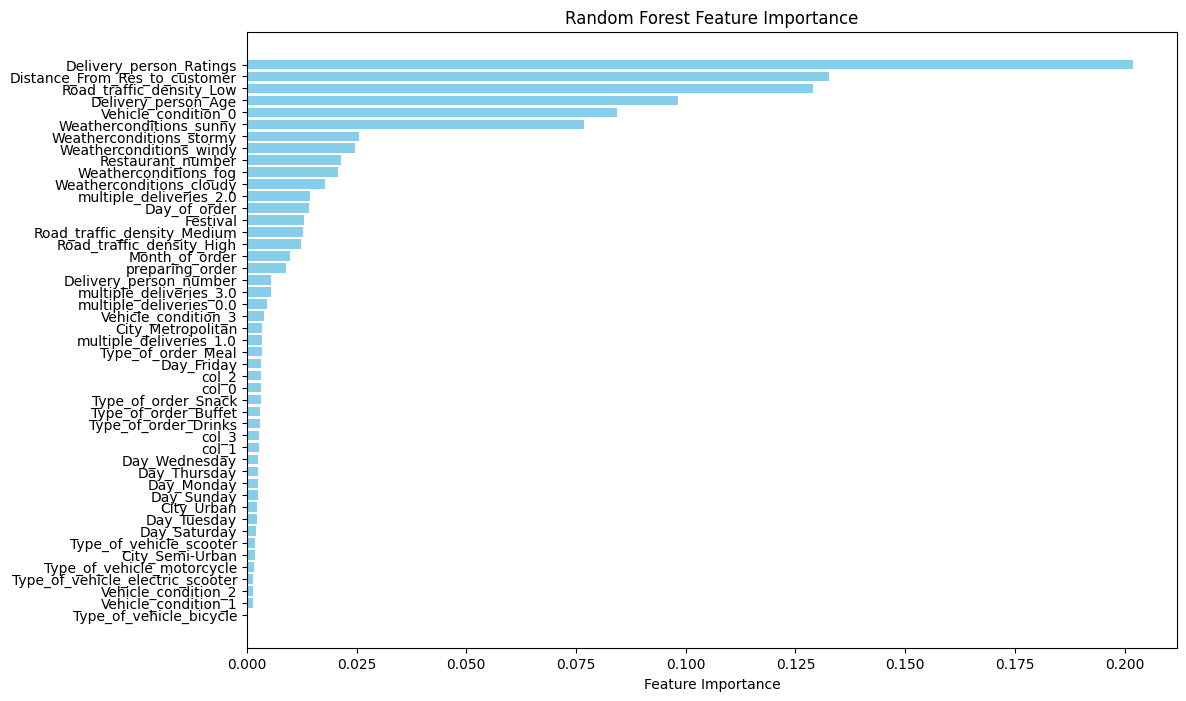

In [202]:
plt.figure(figsize=(12, 8))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color='skyblue'
)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


## `Modling`

In [205]:
model_name=[]
r2score=[]
mae=[]
models=[
    SVR(),
    LinearRegression(),
    GradientBoostingRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
]

In [208]:
y_test=pd.read_csv('../Data/Sample_Submission.csv')

In [209]:
y_test=y_test['Time_taken (min)']

In [210]:
for model in models:
    model.fit(X_train_trans, y_train)
    y_pred = model.predict(x_test_trans)
    model_name.append(model.__class__.__name__)
    r2score.append(r2_score(y_test, y_pred) * 100)
    mae.append(mean_absolute_error(y_test, y_pred))

In [211]:

print("NaNs in X_train:", np.isnan(X_train_trans).sum())
print("NaNs in X_test:", np.isnan(x_test_trans).sum())


NaNs in X_train: 0
NaNs in X_test: 0


In [ ]:
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "R2_score": r2score,
    'MAE': mae
})

model_sorted = models_df.sort_values(by="R2_score",ascending=False)


model_sorted.to_csv("test_models_data.csv", index=False)
model_sorted

,Model-Name,R2_score,MAE
7,XGBRegressor,93.352882,1.565938
4,ExtraTreesRegressor,93.041506,1.527256
3,RandomForestRegressor,92.877078,1.504893
2,GradientBoostingRegressor,89.356965,2.120808
8,XGBRFRegressor,82.351561,2.487713
0,SVR,81.957845,2.712079
1,LinearRegression,72.345016,3.525031
6,DecisionTreeRegressor,71.216639,3.481179
5,AdaBoostRegressor,66.722466,4.046713


Now we perform hyperparameter tuning for an `ExtraTreesRegressor` using `RandomizedSearchCV`:

1. **Parameter Grid (`param_grid`):**
   - Defines a range of hyperparameters to search:
     - `n_estimators`: Number of trees in the forest, ranging from 50 to 1000, with steps of 50.
     - `max_features`: Number of features to consider when looking for the best split (`'auto'`, `'sqrt'`, `'log2'`, or `None`).
     - `max_depth`: Maximum depth of the tree, ranging from 10 to 100, with steps of 10, plus `None`.
     - `min_samples_split`: Minimum number of samples required to split an internal node, ranging from 2 to 10.
     - `min_samples_leaf`: Minimum number of samples required to be at a leaf node, ranging from 1 to 10.
     - `bootstrap`: Whether bootstrap samples are used when building trees (`True` or `False`).

2. **Setup for `RandomizedSearchCV`:**
   - Initializes `ExtraTreesRegressor`.
   - Defines `mae_scorer` as a scorer function for Mean Absolute Error (MAE) where lower scores are better.
   - Configures `RandomizedSearchCV` with:
     - `estimator`: `extra_trees`.
     - `param_distributions`: `param_grid`.
     - `n_iter`: Number of parameter settings to sample (100).
     - `cv`: Number of cross-validation folds (5).
     - `verbose`: Level of verbosity (2).
     - `random_state`: Seed for reproducibility (42).
     - `n_jobs`: Number of jobs to run in parallel (-1 for using all processors).
     - `scoring`: r2_Score.

3. **Model Fitting and Results:**
   - Fits the `RandomizedSearchCV` on `X_2_train_f2` and `y_train`.
   - Retrieves and prints the best hyperparameters and the best mean absolute error score.

In [214]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='auto',   
    predictor='cpu_predictor'  
)

# Parameter grid for CPU training
param_grid_xgb = {
    'n_estimators': list(range(100, 1001, 100)),
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': list(range(3, 15)),
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 2, 5, 10]
}

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search_xgb.fit(X_train_trans, y_train)

# Best hyperparameters
print("Best Hyperparameters (XGB):", random_search_xgb.best_params_)

# Best model
best_xgb = random_search_xgb.best_estimator_

# Predict
y_pred_xgb = best_xgb.predict(x_test_trans)

# Evaluate
print("R2 Score on Test Data (XGB):", r2_score(y_test, y_pred_xgb))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\2M\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:50:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters (XGB): {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
R2 Score on Test Data (XGB): 0.9466471485003284


In [216]:
joblib.dump(best_xgb,"xgb_model_full_feature.pkl")


['xgb_model_full_feature.pkl']

### `End Of The Note Book I Hope You Enjoyed it if you have any comments contanct me`